In [1]:
import pandas as pd 
from pathlib import Path
data_folder = Path("data").resolve()

In [2]:
import pandas as pd

# Read the Excel file into a dictionary of dataframes
df_dict = pd.read_excel(data_folder / 'cc_Dataset.xlsx', sheet_name=['Sales 19-21', 'Sales 17-18', 'TV Spent', 'PromotionalEvents', 'OnsiteTrade'])

# Create a separate dataframe for each sheet_name in the dictionary
sales_19_21_df = df_dict['Sales 19-21']
sales_17_18_df = df_dict['Sales 17-18']
tv_spent_df = df_dict['TV Spent']
promo_events_df = df_dict['PromotionalEvents']
onsite_trade_df = df_dict['OnsiteTrade']


In [3]:
# Find out ranges of dates
print(f"Sales 17-18 min date: {sales_17_18_df['Date'].min()}")
print(f"Sales 17-18 max date: {sales_17_18_df['Date'].max()}")


print(f"Sales 19-21 min date: {sales_19_21_df['Date'].min()}")
print(f"Sales 19-21 max date: {sales_19_21_df['Date'].max()}")


print(f"TV SPENT min date: {tv_spent_df['Date'].min()}")
print(f"TV SPENT max date: {tv_spent_df['Date'].max()}")


print(f"Promotional Events min date: {promo_events_df['Date'].min()}")
print(f"Promotional Events max date: {promo_events_df['Date'].max()}")

print(f"Onsite Trade min date: {onsite_trade_df['Date'].min()}")
print(f"Onsite Trade max date: {onsite_trade_df['Date'].max()}")


Sales 17-18 min date: 2017-01-01 00:00:00
Sales 17-18 max date: 2018-12-01 00:00:00
Sales 19-21 min date: 2019-01-07 00:00:00
Sales 19-21 max date: 2021-07-12 00:00:00
TV SPENT min date: 2019-01-07 00:00:00
TV SPENT max date: 2021-07-12 00:00:00
Promotional Events min date: 2017-02-01 00:00:00
Promotional Events max date: 2021-12-01 00:00:00
Onsite Trade min date: 2017-01-01 00:00:00
Onsite Trade max date: 2020-12-01 00:00:00


In [4]:
# Concat sales into one dataframe
sales_frames = [sales_17_18_df, sales_19_21_df]
sales = pd.concat(sales_frames)

In [5]:
print(f"Sales data min date: {sales['Date'].min()}")
print(f"Sales data max date: {sales['Date'].max()}")

Sales data min date: 2017-01-01 00:00:00
Sales data max date: 2021-07-12 00:00:00


In [6]:
sales = sales.sort_values(by='Date')

In [7]:
sales.head()

,Date,Value
0,2017-01-01,83256.294414
1,2017-02-01,56386.698300
2,2017-03-01,43572.923602
3,2017-04-01,34325.450250
4,2017-05-01,32764.042520


In [9]:
sales.rename(columns={'Value': 'sales'}, inplace=True)

In [10]:
# Rename some column in tv promotional adds
tv_spent_df = tv_spent_df.rename(columns={'Channel 1': 'tv_channel_1', 
'Channel 2': 'tv_channel_2', 'Channel 3':'tv_channel_3'})

In [11]:
# Merge the TV spending data with the sales data
sales_tv_spent = pd.merge(sales, tv_spent_df, on='Date')

# Merge the promotional events data with the sales data
sales_promo_events = pd.merge(sales, promo_events_df, on='Date')

# Merge the trade marketing data with the sales data
sales_onsite_trade = pd.merge(sales, onsite_trade_df, on='Date')

In [12]:
# Work with tv promotional adds
sales_tv_spent.head()

,Date,sales,tv_channel_1,tv_channel_2,tv_channel_3
0,2019-01-07,2333.774722,605,125,37.381706
1,2019-01-14,2140.697120,508,167,34.766218
2,2019-01-21,2485.883420,0,166,46.756001
3,2019-01-28,2777.820794,0,191,47.218405
4,2019-02-04,2875.494071,0,158,44.303406


In [14]:
# Find out what is corralated with sales
corr_tv_spent = sales_tv_spent.corr()['sales'].loc['tv_channel_1':'tv_channel_3']
corr_tv_spent

tv_channel_1    0.225166
tv_channel_2    0.553599
tv_channel_3    0.805690
Name: sales, dtype: float64

In [16]:
import numpy as np 
# Calculate the total TV spending
tv_spending = sales_tv_spent['tv_channel_1'] + sales_tv_spent['tv_channel_2'] + sales_tv_spent['tv_channel_3']

# Calculate the ROI for each TV channel
sales_tv_spent['TV_Channel_1_ROI'] = (sales_tv_spent.sales * sales_tv_spent['tv_channel_1']) / np.where(tv_spending == 0, 1, tv_spending)
sales_tv_spent['TV_Channel_2_ROI'] = (sales_tv_spent.sales * sales_tv_spent['tv_channel_2']) / np.where(tv_spending == 0, 1, tv_spending)
sales_tv_spent['TV_Channel_3_ROI'] = (sales_tv_spent.sales * sales_tv_spent['tv_channel_3']) / np.where(tv_spending == 0, 1, tv_spending)

# Calculate the total ROI for all TV channel investments
sales_tv_spent['TV_ROI'] = sales_tv_spent.sales / np.where(tv_spending == 0, 1, tv_spending)



In [17]:
# Calculate overall tv spending
sales_tv_spent['tv_spending'] = sales_tv_spent['tv_channel_1'] + sales_tv_spent['tv_channel_2'] + sales_tv_spent['tv_channel_3']

In [18]:
sales_tv_spent.sort_values(by = 'Date', inplace= True)

<AxesSubplot:xlabel='Date', ylabel='TV_Channel_3_ROI'>

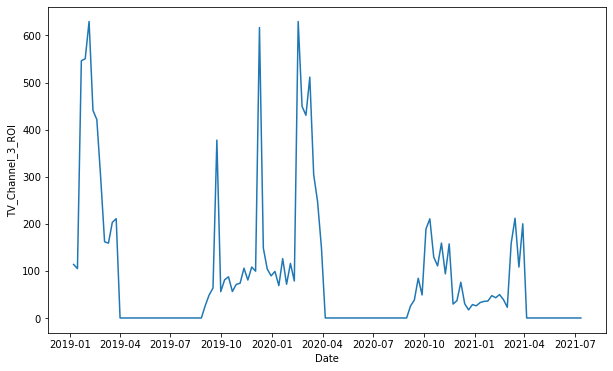

In [19]:
sales_tv_spent_date = sales_tv_spent.set_index('Date')

import matplotlib.pyplot as plt
import seaborn as sns

# Create a line plot of the ROI metrics over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_tv_spent_date['TV_Channel_3_ROI'])

In [ ]:
sales_tv_spent_date_month=  sales_tv_spent_date.resample('M').mean()

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=sales_tv_spent_date[['Value', 'tv_spending',  'TV_Channel_3_ROI']])

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=sales_tv_spent_date_month[['Value', 'tv_spending',  'TV_Channel_3_ROI']])

# Set the tick labels for the x-axis
tick_labels = [d.strftime('%B %Y') for d in sales_tv_spent_date_month.index]
plt.xticks(sales_tv_spent_date_month.index, tick_labels, rotation=45, ha='right')
# Add labels and title to the plot
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Monthly Sales, TV Spending, and TV Channel 3 ROI')

# Display the plot
plt.show()

In [ ]:
sales_tv_spent_date_q=  sales_tv_spent_date.resample('Q').mean()
plt.figure(figsize=(15, 10))
sns.lineplot(data=sales_tv_spent_date_q[['Value', 'tv_spending',  'TV_Channel_1_ROI','TV_Channel_2_ROI', 'TV_Channel_3_ROI' ]])
tick_labels = [f'Q{q.quarter} {q.year}' for q in sales_tv_spent_date_q.index]
plt.xticks(sales_tv_spent_date_q.index, tick_labels,  rotation=45, ha='right')
# Add labels and title to the plot
plt.xlabel('Quarter')
plt.ylabel('Value')
plt.title('Monthly Sales, TV Spending, and TV Channel 3 ROI')

# Display the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



# Smooth the lines by calculating a rolling average with window size 2 quarters
sales_tv_spent_date_q_smoothed = sales_tv_spent_date_q.rolling(window=2).mean()

# Create the line plot with smoothed data
plt.figure(figsize=(15, 10))
sns.lineplot(data=sales_tv_spent_date_q_smoothed[['Value', 'tv_spending', 'TV_Channel_1_ROI', 'TV_Channel_2_ROI', 'TV_Channel_3_ROI', 'TV_ROI']])

# Set the tick labels for the x-axis
tick_labels = [f'Q{q.quarter} {q.year}' for q in sales_tv_spent_date_q_smoothed.index]
plt.xticks(sales_tv_spent_date_q_smoothed.index, tick_labels, rotation=45, ha='right')

# Add labels and title to the plot
plt.xlabel('Quarter')
plt.ylabel('Value')
plt.title('Quarterly Sales, TV Spending, and TV Channel ROI (Smoothed)')

# Display the plot
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(sales_tv_spent.corr(), annot=True)

In [ ]:
sales_tv_spent.corr()['Value'].loc['tv_channel_1':'TV_ROI'].sort_values()

In [ ]:
# sales promotional events 

print(sales_promo_events.head())

In [ ]:
sales_promo_events.sort_values(by ='Cost')

In [ ]:
# Group the data by Topic and calculate the total sales and total promotional expenses
grouped = sales_promo_events.groupby(['Topic', 'Date']).agg({'Value': 'sum', 'Cost': 'sum'})


In [ ]:
grouped.head()

In [ ]:
grouped['ROI'] = (grouped['Value'] - grouped['Cost']) / grouped['Cost']



In [ ]:
grouped = grouped.reset_index()

In [ ]:
grouped_promo_events = grouped.copy()

In [ ]:
grouped_promo_events.isna().sum()

In [ ]:
grouped_promo_events.set_index('Date', inplace=True)

In [ ]:
grouped_promo_events

In [ ]:
cough_promo_event = grouped_promo_events.query("Topic == 'COUGH' ")

In [ ]:
cough_promo_event.drop('Topic', axis=1, inplace=True)

In [ ]:
cough_promo_event_m =  cough_promo_event.resample('Q').mean()
cough_promo_event_m = cough_promo_event_m.fillna(0)

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=cough_promo_event_m[['Value', 'Cost',  'ROI']])

# Set the tick labels for the x-axis
tick_labels = [f'Q{q.quarter} {q.year}' for q in cough_promo_event_m.index]
plt.xticks(cough_promo_event_m.index, tick_labels,  rotation=45, ha='right')
# Add labels and title to the plot
plt.xlabel('Quarter')
plt.ylabel('Value')
plt.title('Quarter Sales, Cost and ROI for Cough Events')

# Display the plot
plt.show()

In [ ]:
cough_promo_event.sort_values(by = 'Date')

In [ ]:
((56386.698300 - 23.505) / 23.505) 

In [ ]:
((1000-100) / 100) * 100

In [ ]:
cough_promo_event
plt.figure(figsize=(15, 10))
sns.lineplot(data=cough_promo_event[['ROI', 'Cost']])

In [ ]:
sales_onsite_trade = sales_onsite_trade.rename(columns={'Value_x': 'Sales', 'Value_y':'Cost'})

In [ ]:
sales_onsite_trade

In [ ]:
sales_onsite_trade.Region.unique()

In [ ]:
# Group the data by Topic and calculate the total sales and total promotional expenses
grouped_onsite_trade = sales_onsite_trade.groupby(['Region', 'Date']).agg({'Sales': 'sum', 'Cost': 'sum'})

# Drop the rows where 'Cost' is 0
grouped_onsite_trade = grouped_onsite_trade[grouped_onsite_trade['Cost'] != 0]

# Calculate the ROI
grouped_onsite_trade['ROI'] = (grouped_onsite_trade['Sales'] - grouped_onsite_trade['Cost']) / grouped_onsite_trade['Cost']


In [ ]:
grouped_onsite_trade = grouped_onsite_trade.reset_index()

In [ ]:
print(grouped_onsite_trade.head())

In [ ]:
# Create a line plot of ROI by region
sns.relplot(data=grouped_onsite_trade, x='Date', y='ROI', hue='Region', kind='line', height=5, aspect=1.5)

# Add a title to the chart
plt.title('ROI by Region')

# Display the chart
plt.show()





In [ ]:
print(sales_tv_spent[['Value', '']].head())

In [ ]:
print(grouped_onsite_trade.head())

In [ ]:
print(grouped_promo_events.head())